In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Pokemon.csv')

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


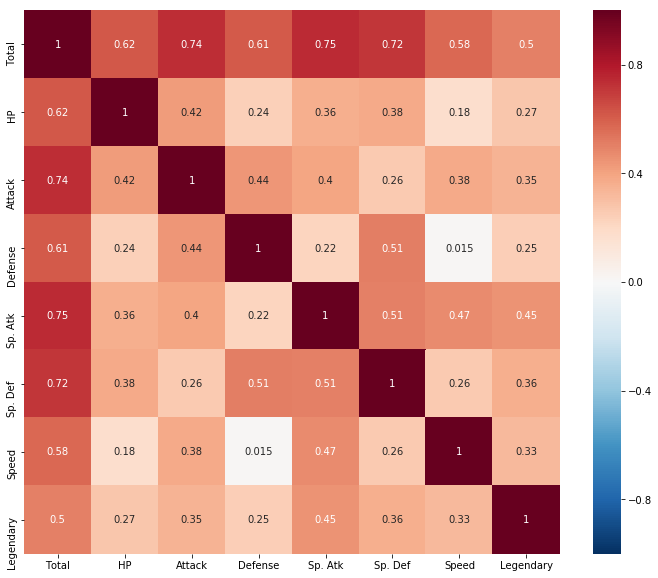

In [6]:
check_corr = df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']]
correlation = check_corr.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

/Users/drakebennion/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/drakebennion/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


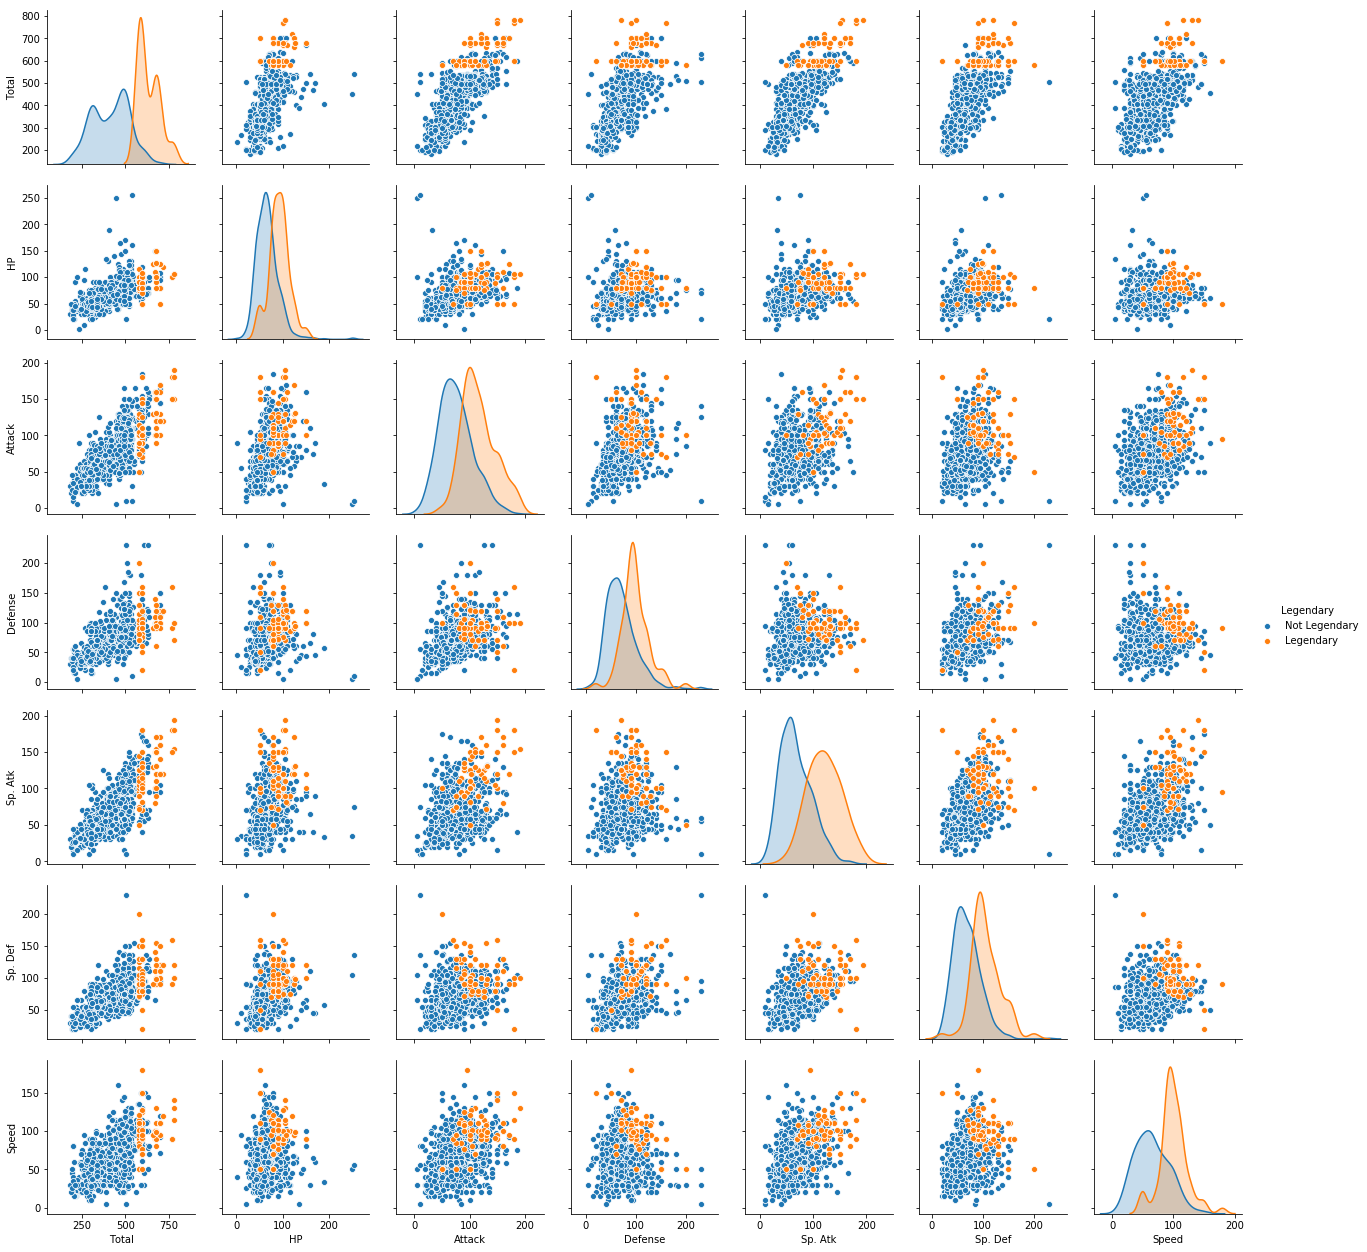

In [7]:
legendaries = check_corr.Legendary == True
non_legendaries = check_corr.Legendary == False
check_corr.loc[legendaries, 'Legendary'] = 'Legendary'
check_corr.loc[non_legendaries, 'Legendary'] = 'Not Legendary'
sns.pairplot(check_corr, hue='Legendary')

In [531]:
def accuracy(tp, tn, total):
    return (tp + tn) / total

def misclassification_rate(fp, fn, total):
    return (fp + fn) / total

def recall(tp, actual):
    return tp / actual

def precision(tp, predicted):
    return tp / predicted

def f1(precision, recall):
    return 2 * precision * recall / (precision + recall)

def matthews_cc(tn, fp, fn, tp):
    num = tp * tn - fp * fn
    den = ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5
    return num / den

In [580]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix

X = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

X = preprocessing.StandardScaler().fit(X).transform(X)
y = df['Legendary']

val_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=val_size)

clf = svm.SVC()
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
(tn, fp, fn, tp) = confusion_matrix(y_test, yhat).ravel()
print ("true negatives", tn, "false positives", fp, "false negatives", fn, "true positives", tp)
total = 800 * val_size
print("accuracy", accuracy(tp, tn, total))
print("misclassification rate", misclassification_rate(fp, fn, total))
print("recall", recall(tp * 1.0, tp + fn))
print("precision", precision(tp * 1.0, tp + fp))
print("f1 score", f1(precision(tp * 1.0, tp + fp), recall(tp * 1.0, tp + fn)))
print("matthews correlation coefficient", matthews_cc(tn, fp, fn, tp))

('true negatives', 177, 'false positives', 6, 'false negatives', 8, 'true positives', 9)
('accuracy', 0.93)
('misclassification rate', 0.07)
('recall', 0.5294117647058824)
('precision', 0.6)
('f1 score', 0.5625)
('matthews correlation coefficient', 0.5258319667088092)
